## Importing the libraries

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## image predefined size 
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'



## Convolutional Neural Network
### Building the CNN

In [3]:
## Initialising the CNN
model=Sequential()
## Convolution
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
## Pooling
model.add(MaxPooling2D(pool_size=2))
## Adding a second convolutional layer
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
## Adding a one more  convolutional layer
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
## Full Connection
model.add(Flatten())
## Output Layer
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

## preprocessing dataset

In [4]:
# preprocessing training dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
# apply predefined specification to training dataset 
training_set = train_datagen.flow_from_directory('C:/Users/Administrator/Desktop/Term 3/ML/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [6]:
training_set

In [7]:
# apply predefined specification to test dataset 
test_set = test_datagen.flow_from_directory('C:/Users/Administrator/Desktop/Term 3/ML/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


## Training the CNN

In [8]:
## compiling the CNN
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [9]:
# Training the CNN on the Training set and evaluating it on the Test set
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
13/13 [==============================] - 19s 1s/step - loss: 1.1144 - accuracy: 0.4897 - val_loss: 0.6723 - val_accuracy: 0.6045
Epoch 2/25
13/13 [==============================] - 15s 1s/step - loss: 0.6374 - accuracy: 0.5691 - val_loss: 0.6955 - val_accuracy: 0.4701
Epoch 3/25
13/13 [==============================] - 15s 1s/step - loss: 0.4732 - accuracy: 0.7999 - val_loss: 1.1588 - val_accuracy: 0.4104
Epoch 4/25
13/13 [==============================] - 15s 1s/step - loss: 0.4169 - accuracy: 0.7946 - val_loss: 0.9594 - val_accuracy: 0.5224
Epoch 5/25
13/13 [==============================] - 15s 1s/step - loss: 0.3657 - accuracy: 0.8327 - val_loss: 0.7566 - val_accuracy: 0.5821
Epoch 6/25
13/13 [==============================] - 15s 1s/step - loss: 0.3029 - accuracy: 0.8751 - val_loss: 0.7624 - val_accuracy: 0.5896
Epoch 7/25
13/13 [==============================] - 15s 1s/step - loss: 0.2819 - accuracy: 0.8924 - val_loss: 0.6679 - val_accuracy: 0.6567
Epoch 8/25
13/13 [==

In [10]:
## compariosn of accuracy and loss function

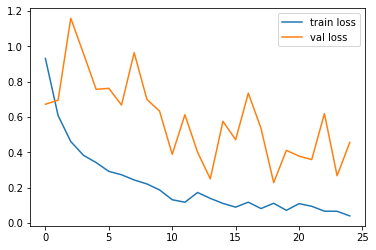

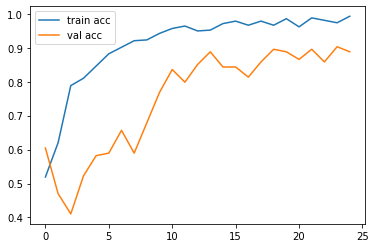

<Figure size 432x288 with 0 Axes>

In [11]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [12]:
##  prediciton of test dataset 
y_pred = model.predict(test_set)

In [13]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [14]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [15]:
##image loading
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [16]:
img=image.load_img('C:/Users/Administrator/Desktop/Term 3/ML/Dataset/Test/Uninfected/2.png',target_size=(224,224))


In [17]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [18]:
x.shape

(224, 224, 3)

In [19]:
x=x/255

In [20]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [21]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [22]:
a=np.argmax(model.predict(img_data), axis=1)

In [23]:
a

array([1], dtype=int64)

In [25]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
